## Telcom Industry Churn Analysis 

In [38]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

#### Loading the data

In [73]:
df = pd.read_csv(r"Data\\Data_Telco_Customer_Churn.csv")

In [74]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


###  Data Cleaning

In [76]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

 Notice that TotalCharges column is of object datatype, we figured out this column has some blank spaces which has caused pandas to forced it as object. Let's fix this

In [77]:
# Replace blank with np.nan
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan).str.strip()

# convert to float
df['TotalCharges'] = df['TotalCharges'].astype('float64')


<AxesSubplot:>

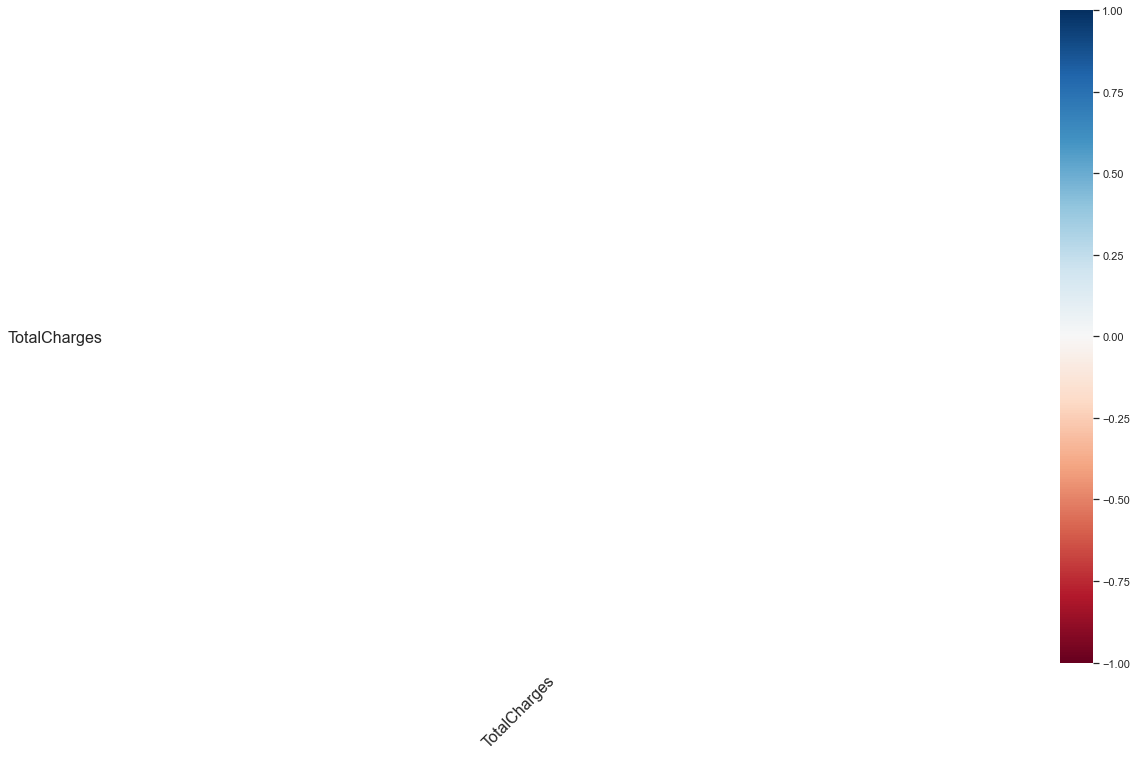

In [78]:
# Visualizing Missing Value
# msno.bar(df)
msno.heatmap(df)

In [79]:
# Both from the above visualization and with isnull method we can see that TotalCharges column has missing values, let's check these records
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [80]:
df.loc[df['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Since the % of these records compared to total dataset is very low i.e 0.15%, it is safe to ignore them from further processing. However they can be imputed based on domain knowledge 

In [81]:
# Removing missing values 
df.dropna(how = 'any', inplace=True)
df.fillna(0)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [82]:
# Drop the Customer ID column as it has less feature importance
df.drop(['customerID'],axis=1, inplace=True)
# seperate categorial and numeric  column dtypes
numeric_cols = df.select_dtypes(include=[np.number])
categoric_cols = df.select_dtypes(include=[object])

In [83]:
# Replace all the special chars  space with _ in categorical columns
Transformed_cat = categoric_cols.replace(" |-","_",regex=True)
Transformed_cat.head(10)


,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No_phone_service,DSL,No,Yes,No,No,No,No,Month_to_month,Yes,Electronic_check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One_year,No,Mailed_check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month_to_month,Yes,Mailed_check,Yes
3,Male,No,No,No,No_phone_service,DSL,Yes,No,Yes,Yes,No,No,One_year,No,Bank_transfer_(automatic),No
4,Female,No,No,Yes,No,Fiber_optic,No,No,No,No,No,No,Month_to_month,Yes,Electronic_check,Yes
5,Female,No,No,Yes,Yes,Fiber_optic,No,No,Yes,No,Yes,Yes,Month_to_month,Yes,Electronic_check,Yes
6,Male,No,Yes,Yes,Yes,Fiber_optic,No,Yes,No,No,Yes,No,Month_to_month,Yes,Credit_card_(automatic),No
7,Female,No,No,No,No_phone_service,DSL,Yes,No,No,No,No,No,Month_to_month,No,Mailed_check,No
8,Female,Yes,No,Yes,Yes,Fiber_optic,No,No,Yes,Yes,Yes,Yes,Month_to_month,Yes,Electronic_check,Yes
9,Male,No,Yes,Yes,No,DSL,Yes,Yes,No,No,No,No,One_year,No,Bank_transfer_(automatic),No


In [84]:
Transformed_cat.PaymentMethod = Transformed_cat.PaymentMethod.str.replace('\(|\)', '_', regex=True)
Transformed_cat.PaymentMethod = Transformed_cat.PaymentMethod.str.replace('__', '_', regex=True)
Transformed_cat.PaymentMethod


0               Electronic_check
1                   Mailed_check
2                   Mailed_check
3       Bank_transfer_automatic_
4               Electronic_check
                  ...           
7038                Mailed_check
7039      Credit_card_automatic_
7040            Electronic_check
7041                Mailed_check
7042    Bank_transfer_automatic_
Name: PaymentMethod, Length: 7032, dtype: object

In [85]:
Transformed_cat.PaymentMethod = Transformed_cat.PaymentMethod.str.replace('_', ' ', regex=True)
Transformed_cat.PaymentMethod = Transformed_cat.PaymentMethod.str.strip()
Transformed_cat.PaymentMethod = Transformed_cat.PaymentMethod.str.replace(' ', '_', regex=True)

Transformed_cat.PaymentMethod

0              Electronic_check
1                  Mailed_check
2                  Mailed_check
3       Bank_transfer_automatic
4              Electronic_check
                 ...           
7038               Mailed_check
7039      Credit_card_automatic
7040           Electronic_check
7041               Mailed_check
7042    Bank_transfer_automatic
Name: PaymentMethod, Length: 7032, dtype: object

In [86]:
df = pd.concat([numeric_cols,Transformed_cat],axis=1)
df.info()
df.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   int64  
 1   tenure            7032 non-null   int64  
 2   MonthlyCharges    7032 non-null   float64
 3   TotalCharges      7032 non-null   float64
 4   gender            7032 non-null   object 
 5   Partner           7032 non-null   object 
 6   Dependents        7032 non-null   object 
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,Female,Yes,No,No,No_phone_service,DSL,No,Yes,No,No,No,No,Month_to_month,Yes,Electronic_check,No
1,0,34,56.95,1889.50,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One_year,No,Mailed_check,No
2,0,2,53.85,108.15,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month_to_month,Yes,Mailed_check,Yes
3,0,45,42.30,1840.75,Male,No,No,No,No_phone_service,DSL,Yes,No,Yes,Yes,No,No,One_year,No,Bank_transfer_automatic,No
4,0,2,70.70,151.65,Female,No,No,Yes,No,Fiber_optic,No,No,No,No,No,No,Month_to_month,Yes,Electronic_check,Yes
5,0,8,99.65,820.50,Female,No,No,Yes,Yes,Fiber_optic,No,No,Yes,No,Yes,Yes,Month_to_month,Yes,Electronic_check,Yes
6,0,22,89.10,1949.40,Male,No,Yes,Yes,Yes,Fiber_optic,No,Yes,No,No,Yes,No,Month_to_month,Yes,Credit_card_automatic,No
7,0,10,29.75,301.90,Female,No,No,No,No_phone_service,DSL,Yes,No,No,No,No,No,Month_to_month,No,Mailed_check,No
8,0,28,104.80,3046.05,Female,Yes,No,Yes,Yes,Fiber_optic,No,No,Yes,Yes,Yes,Yes,Month_to_month,Yes,Electronic_check,Yes
9,0,62,56.15,3487.95,Male,No,Yes,Yes,No,DSL,Yes,Yes,No,No,No,No,One_year,No,Bank_transfer_automatic,No


In [87]:
# Churn column is string with Yes/No values. We convert it to binary to make it easier to use in our analysis
df['Churn'] = np.where(df['Churn']=='Yes',1,0)

[Text(0.5, 0, 'Category'),
 Text(0, 0.5, 'Churn Rate'),
 Text(0.5, 1.0, 'Churn Rate For Gender')]

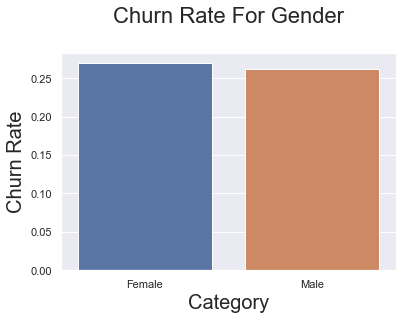

In [88]:
df_plot = df.groupby('gender').Churn.mean().reset_index()
sns.barplot(x=df['gender'],y=df['Churn'],data=df_plot, ci=None).set(xlabel="Category",ylabel='Churn Rate',title='Churn Rate For Gender')

In [89]:
# Gender Breakdown for Chrun Rate
df.groupby('gender').Churn.mean()


gender
Female    0.269595
Male      0.262046
Name: Churn, dtype: float64

Female customers are more likely to churn vs. male customers, but the difference is minimal (~0.8%).

[Text(0.5, 0, 'Internet Service'),
 Text(0, 0.5, 'Churn Rate'),
 Text(0.5, 1.0, 'Churn Rate For Internet Service')]

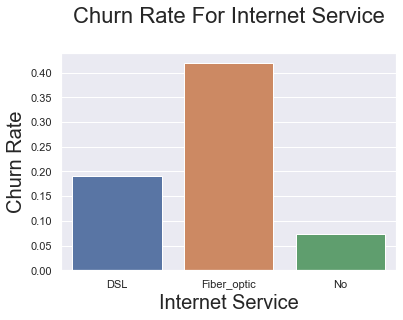

In [90]:
# Internet Service breakdown for Churn rate
df_intSer = df.groupby('InternetService').Churn.mean().reset_index()
sns.barplot(x=df['InternetService'],y=df['Churn'],data=df_intSer, ci=None).set(xlabel="Internet Service",ylabel='Churn Rate',title='Churn Rate For Internet Service')


The above barchart reveals customers who have Fiber optic as Internet Service are more likely to churn. We normally expect Fiber optic customers to churn less due to they use a more premium service. But this can happen due to high prices, competition, customer service, and many other reasons

[Text(0.5, 0, 'Contract Type'),
 Text(0, 0.5, 'Churn Rate'),
 Text(0.5, 1.0, 'Churn Rate For Contract Type')]

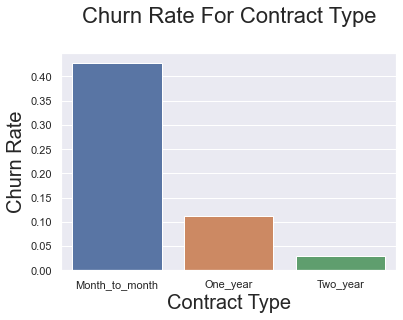

In [91]:
# Contract type breakdown for Churn rate
df_contract = df.groupby('Contract').Churn.mean().reset_index()
sns.barplot(x=df['Contract'],y=df['Churn'],data=df_contract, ci=None).set(xlabel="Contract Type",ylabel='Churn Rate',title='Churn Rate For Contract Type')

As expected, the shorter duration of contract means higher churn rate.

[Text(0.5, 0, 'Tech Support'),
 Text(0, 0.5, 'Churn Rate'),
 Text(0.5, 1.0, 'Tech Support For Contract Type')]

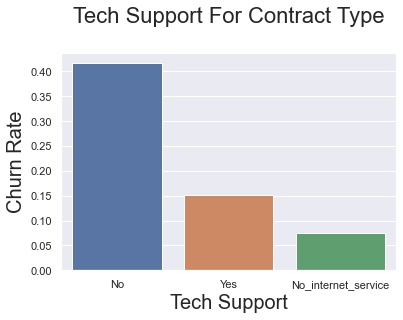

In [92]:
# Tech support breakdown for Churn rate
df_Tech = df.groupby('TechSupport').Churn.mean().reset_index()
sns.barplot(x=df['TechSupport'],y=df['Churn'],data=df_Tech, ci=None).set(xlabel="Tech Support",ylabel='Churn Rate',title='Tech Support For Contract Type')

Customers who do not use Tech Support are more like to churn 

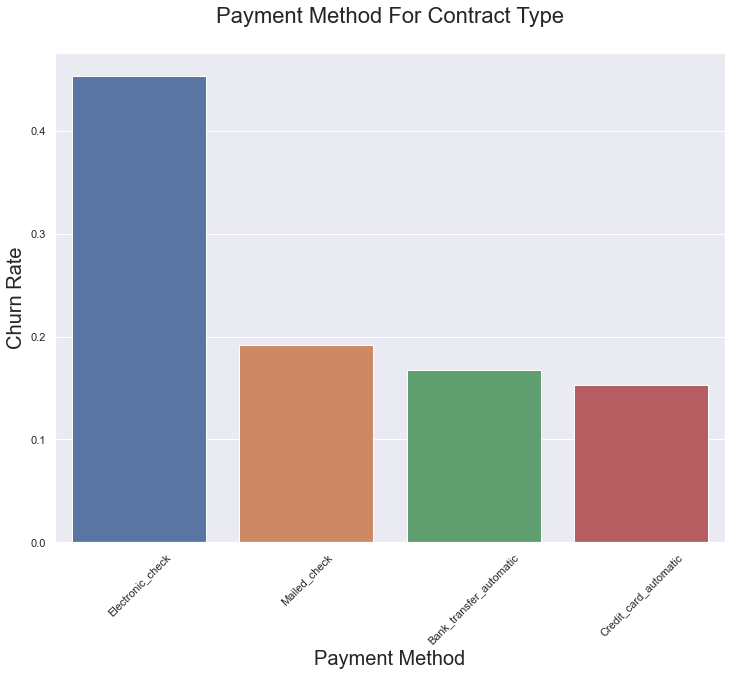

In [93]:
# Payment Method breakdown for Churn rate
f, ax = plt.subplots(figsize=(12, 9))
ax.tick_params(axis='x', rotation=45)
df_payment = df.groupby('PaymentMethod').Churn.mean().reset_index()
chart = sns.barplot(x=df['PaymentMethod'],y=df['Churn'],data=df_payment, ci=None).set(xlabel="Payment Method",ylabel='Churn Rate',title='Payment Method For Contract Type')

Automating the payment method makes the customer more likely to retain in your platform

In [94]:
print('Max Tenure: {}'.format(df['tenure'].max())) 
# Groupping the tenure into bins of 12 months
labels = ['{0}_{1}'.format(i , i+11) for i in range(1,72,12)]
df['tenure_group'] = pd.cut(df.tenure, range(1,80,12), right=False , labels=labels)
df['tenure_group'].value_counts()

Max Tenure: 72


1_12     2175
61_72    1407
13_24    1024
25_36     832
49_60     832
37_48     762
Name: tenure_group, dtype: int64

 Remove the columns that are  not required for processing

### Data Exploration

#### Univariat Analysis

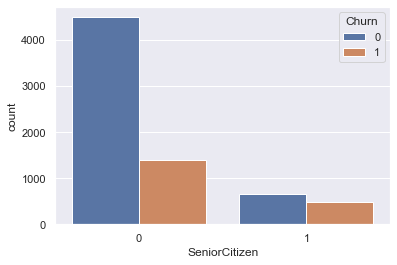

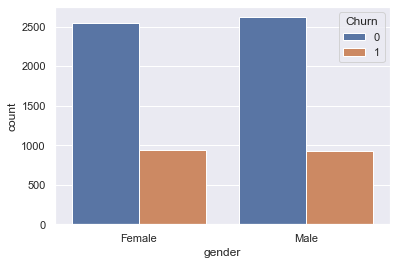

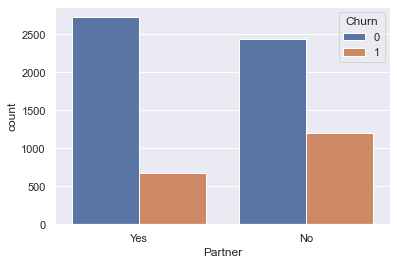

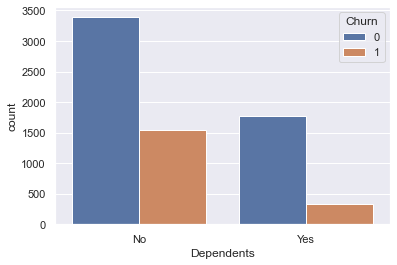

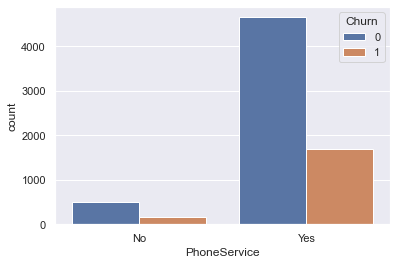

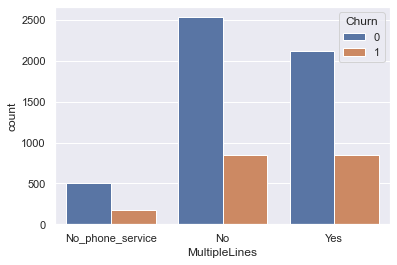

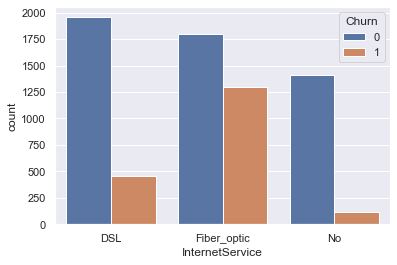

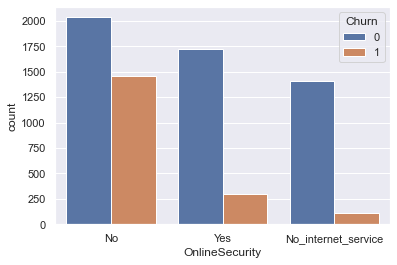

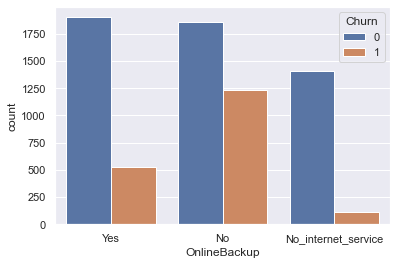

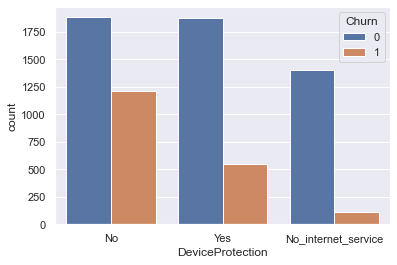

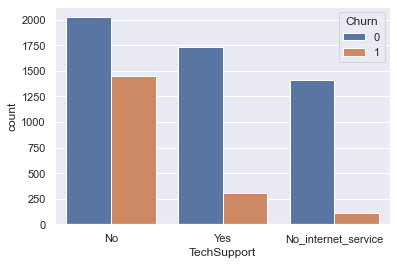

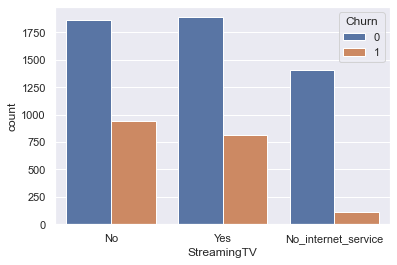

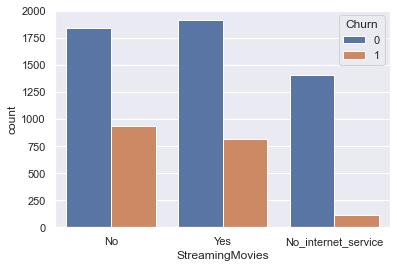

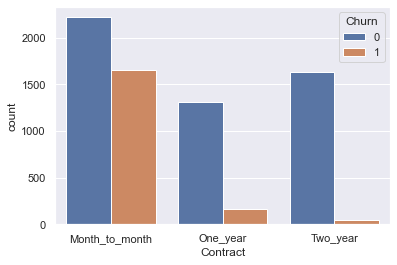

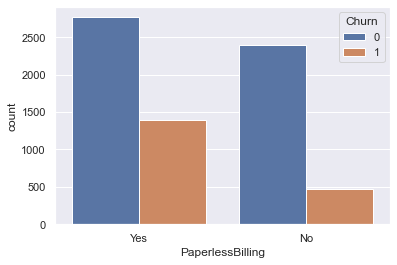

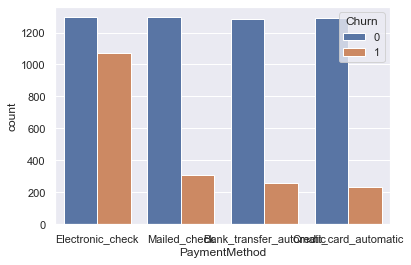

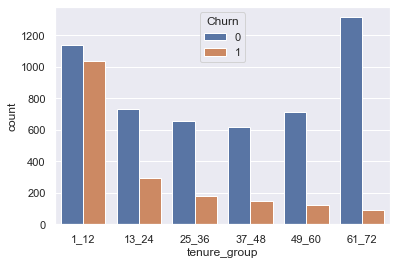

In [95]:
# Plot distibution of individual predictors by churn
for i , predictor in enumerate(df.drop(columns=['Churn','TotalCharges','MonthlyCharges','tenure'])):
    plt.figure(i)
    sns.set_theme(style="darkgrid")
    sns.countplot(data=df , x=predictor, hue='Churn')

Convert all the categorical variables into dummy variables

In [96]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank_transfer_automatic,PaymentMethod_Credit_card_automatic,PaymentMethod_Electronic_check,PaymentMethod_Mailed_check,tenure_group_1_12,tenure_group_13_24,tenure_group_25_36,tenure_group_37_48,tenure_group_49_60,tenure_group_61_72
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


Relationship between Monthly Charges and Total Charges

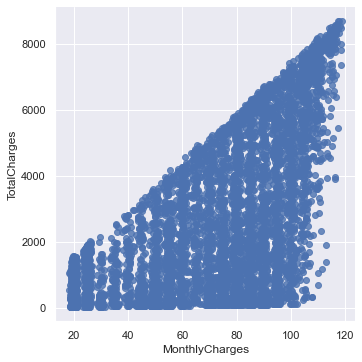

In [97]:
sns.lmplot(data=df_dummies , x = 'MonthlyCharges',y='TotalCharges', palette='pastel',fit_reg=False)

As expected, Total Charges and Monthly Charges are positively correlated

Text(0.5, 1.0, 'Monthly charges by churn')

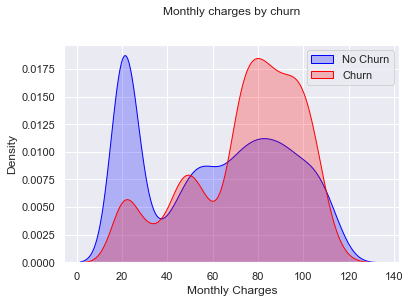

In [98]:
Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 0) ],
                color="Blue", shade = True)
Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 1) ],
                color="Red", shade = True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Churn is high when monthly charges are high

Text(0.5, 1.0, 'Total charges by churn')

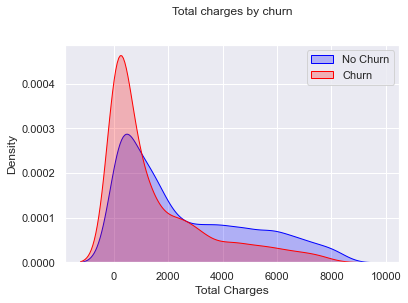

In [99]:
Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 0) ],
                color="Blue", shade = True)
Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 1) ],
                 color="Red", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

Surprising insight as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is a bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linked to High Churn.

Build a correlation of all predictors with 'Churn'

<AxesSubplot:>

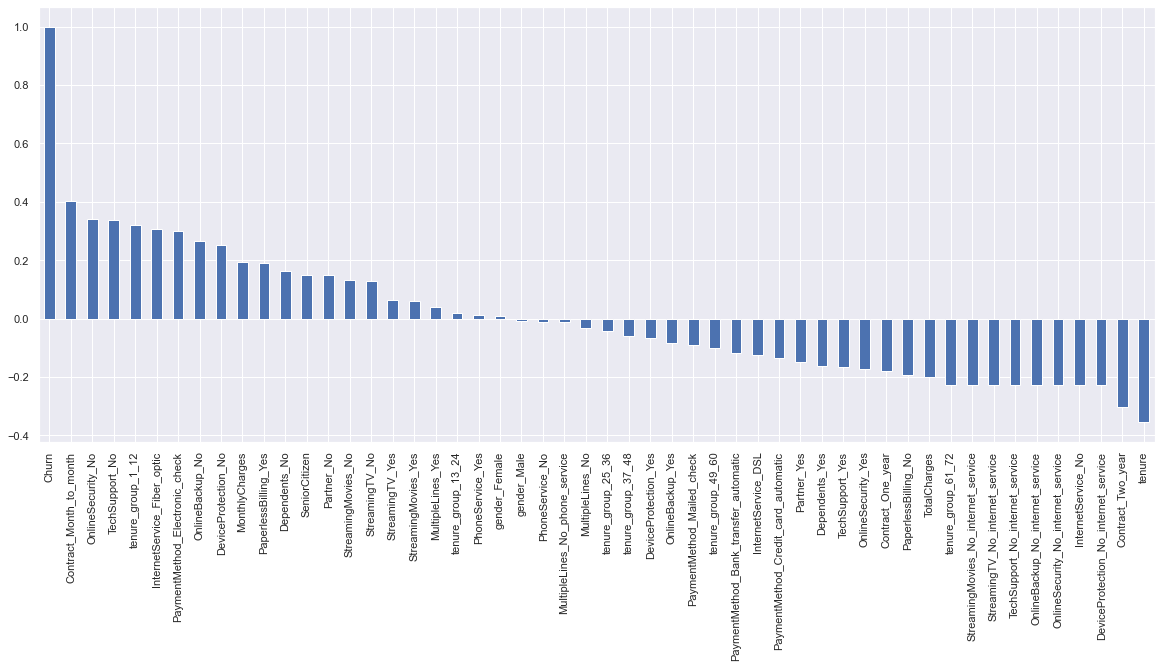

In [100]:
plt.figure(figsize=(20,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Derived Insight:

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

Low Churn is seen in case of Long term contracts, Subscriptions without internet service and the customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and no. of multiple lines have alomost NO impact on Churn

#### Bivariate Analysis

In [101]:
new_df_target0 = df.loc[df["Churn"]==0]
new_df_target1 = df.loc[df["Churn"]==1]

In [102]:
def uniplot(df,col,title,hue=None):
    
    sns.set_theme(style="darkgrid")
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('linear')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')
    plt.show()

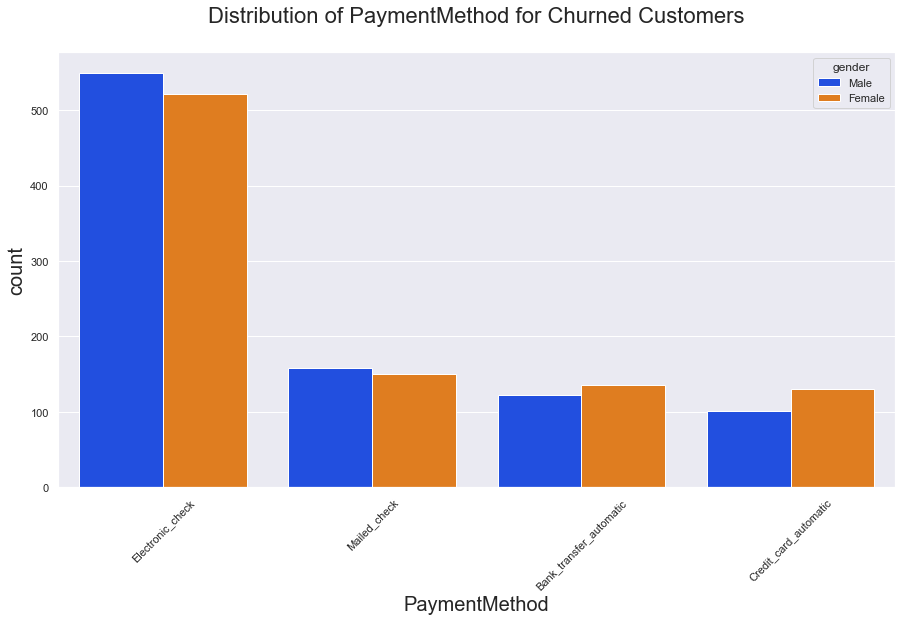

In [103]:
uniplot(new_df_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')


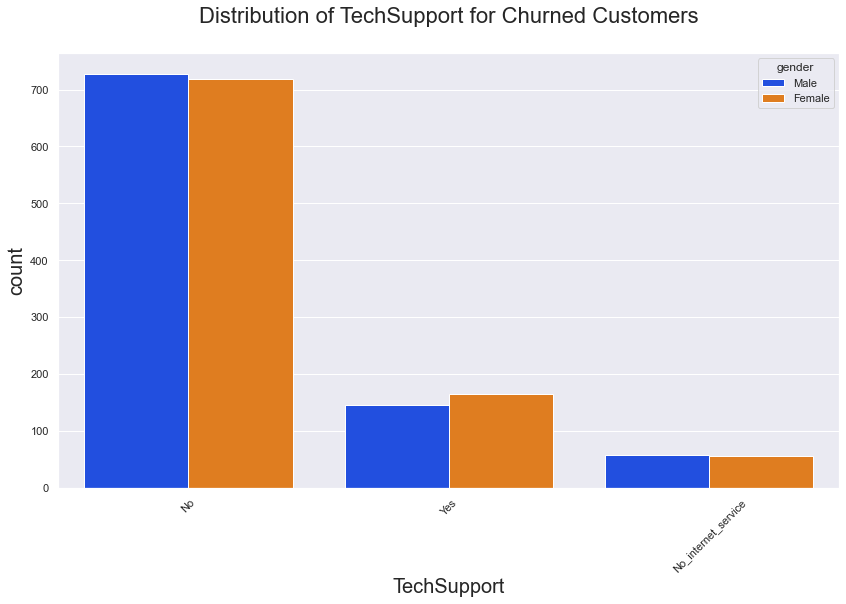

In [104]:
uniplot(new_df_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')


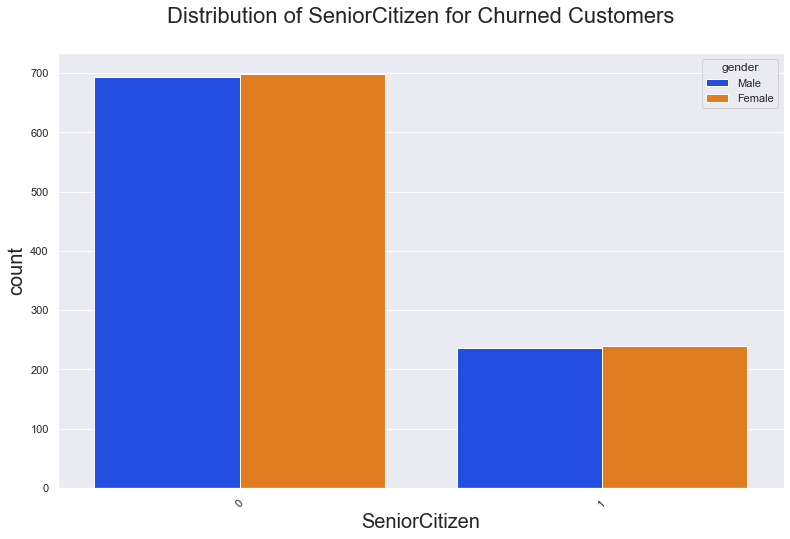

In [105]:
uniplot(new_df_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

#### Insights:
1. Customers who use paymethod as Electronic check are the highest churners
2. No Online security, No Tech Support category are high churners
3. Non senior Citizens are high churners

In [106]:
# Save the data into csv and this will be used as input for Machine learning models
df_dummies.to_csv('telcom_churn.csv',index=False)